In [1]:
import numpy as np
import cv2
import os
import subprocess
import glob
import tensorflow as tf
from net.network import GMCNNModel

In [2]:
model = GMCNNModel()

AttributeError: 'GMCNNModel' object has no attribute 'summary'

In [7]:
reuse = False
sess_config = tf.ConfigProto()
sess_config.gpu_options.allow_growth = False
with tf.Session(config=sess_config) as sess:
    input_image_tf = tf.placeholder(dtype=tf.float32, shape=[1, 512, 512, 3])
    input_mask_tf = tf.placeholder(dtype=tf.float32, shape=[1, 512, 512, 1])
    output = model.evaluate(input_image_tf, input_mask_tf, config=config, reuse=reuse)    

NameError: name 'config' is not defined

In [ ]:
#model.load_weights("G:\labWork\otherLabs\mini_project\functs\inpainting_gmcnn\tensorflow\checkpoints\celebahq_512x512_rect")
sess.run(output)

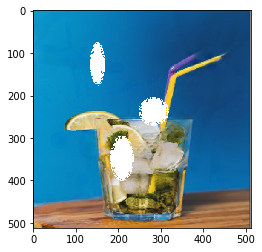

In [7]:
# Load image
im = Image.open(SAMPLE_IMAGE)
# Create image array
im = np.array(im) / 255

#Load Mask
mask = cv2.imread('data/mask.jpg')
mask = np.array(mask) / 255

im[mask==0] = 1
plt.imshow(im)

#image preprocessing
im = [im]
mask = [mask]

In [8]:
from libs.pconv_model import PConvUnet
model = PConvUnet(vgg_weights=None, inference_only=True)
model.load(r"G:\labWork\otherLabs\mini_project\models\weights.26-1.07.h5", train_bn=False)

In [9]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs_img (InputLayer)         (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
inputs_mask (InputLayer)        (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
p_conv2d_49 (PConv2D)           [(None, 256, 256, 64 9472        inputs_img[0][0]                 
                                                                 inputs_mask[0][0]                
__________________________________________________________________________________________________
activation_25 (Activation)      (None, 256, 256, 64) 0           p_conv2d_49[0][0]                
__________

In [10]:
pred_img = model.predict([im, mask])

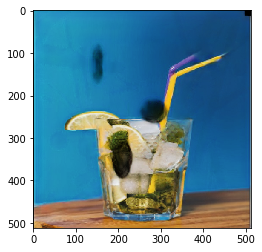

In [11]:
img = pred_img[0]
plt.imshow(img)
matplotlib.image.imsave('data/output.png', img)

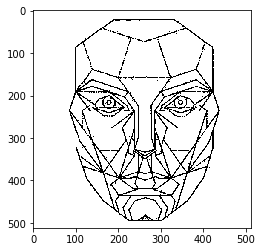

In [114]:
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow

image = Image.open("G:\labWork\otherLabs\mini_project\ideal.jpg")
image = np.asarray(image)
image = image.flatten().reshape(1, -1)
image[0] = (image[0] > 231).astype(int)*255
image = image.reshape(512, 512, 3)
image = Image.fromarray(image, 'RGB')
imshow(image)

In [115]:
image.save("G:\labWork\otherLabs\mini_project\ideal.png")